In [4]:
import torch
import numpy as np
import os
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt


Using cache found in C:\Users\aarya admane/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-4-6 Python-3.12.4 torch-2.6.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
C:\Users\aarya admane/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


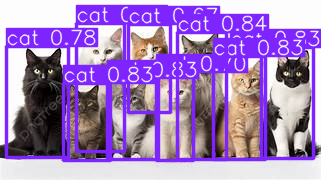

         xmin       ymin        xmax        ymax  confidence  class name
0  177.839691  32.505505  226.281433  159.793350    0.843091     15  cat
1  213.343887  56.729786  265.985413  159.262314    0.833336     15  cat
2  261.292725  47.199413  313.350952  158.822128    0.829505     15  cat
3   63.668076  83.525986  110.572449  160.032074    0.829257     15  cat
4  107.074654  78.883492  158.765198  159.066498    0.825258     15  cat
5    6.643497  46.805138   68.842865  157.139984    0.779678     15  cat
6  156.106857  72.642479  193.346741  160.376923    0.695356     15  cat
7  128.786469  24.983654  170.251160  112.260658    0.672087     15  cat
8   76.146461  23.930853  124.691902  151.420197    0.610780     15  cat


In [5]:
# Load pre-trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # Correct repository
model.conf = 0.25  # Set confidence threshold

def detect_objects(image_path):
    """Detect objects in an image using YOLOv5."""
    if not os.path.exists(image_path):
        print(f"Error: Image '{image_path}' not found.")
        return None
    image = Image.open(image_path).convert("RGB")  # Ensure correct format
    results = model(image)  # Perform inference
    results.show()

    detections = results.pandas().xyxy[0]  # Get bounding boxes
    if detections.empty:
        print("No objects detected.")
        return None

    return detections

def plot_detections(image_path, detections):
    """Plot detected objects on the image."""
    if detections is None:
        print("No objects to plot.")
        return
    image = Image.open(image_path).convert("RGB")
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()

    for _, row in detections.iterrows():
        x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
        label = f"{row['name']} ({row['confidence']:.2f})"
        draw.rectangle([x1, y1, x2, y2], outline="green", width=2)
        draw.text((x1, y1 - 10), label, fill="green", font=font)

    plt.imshow(image)
    plt.axis("off")
    plt.show()

if __name__ == "__main__":
    #  add r in the path starting
    image_path = r"C:\Users\aarya admane\OneDrive\Desktop\th.jpeg" # Ensure this file exists in the working directory
    detections = detect_objects(image_path)
    if detections is not None:
        print(detections)
        plot_detections(image_path, detections)
